In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [223]:

file_path = "Cleaned_Financials.csv"
df = pd.read_csv(file_path)

In [224]:
print(df.isnull().sum())
#null values from profit not removed

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                 63
Date                    0
Month Number            0
Month Name              0
Year                    0
Month                   0
dtype: int64


In [225]:
df = df.dropna(subset=['Profit'])

In [226]:
print(df.isnull().sum())

Segment                 0
Country                 0
Product                 0
Discount Band          53
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
Month                   0
dtype: int64


# Baseline model: linear regression

In [227]:
numeric_features = ['Sale Price', 'Units Sold', 'Manufacturing Price', 'COGS']

X = df[numeric_features]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [228]:
# Create a linear regression model
model = LinearRegression()
# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# Evaluation of linear regression

In [229]:
print("Regression Coefficients:")
print("Intercept:", model.intercept_)
for feature, coefficient in zip(numeric_features, model.coef_):
    print(f"{feature}: {coefficient}")

print("\nLinear regression Performance:")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"  Mean Absolute Error (MAE): {mae:,.2f}")
print(f"  R² Score: {r2:.4f}")

Regression Coefficients:
Intercept: -4981.333810269509
Sale Price: 47.74083451612354
Units Sold: 4.6733413290367105
Manufacturing Price: 10.47960173953419
COGS: 0.13405372579034758

Linear regression Performance:
  Mean Squared Error (MSE): 557788287.63
  Root Mean Squared Error (RMSE): 23,617.54
  Mean Absolute Error (MAE): 14,184.09
  R² Score: 0.6711


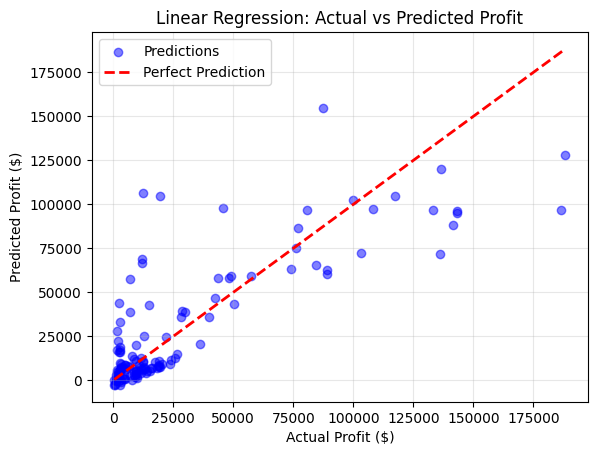

In [230]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression: Actual vs Predicted Profit')
plt.xlabel('Actual Profit ($)')
plt.ylabel('Predicted Profit ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Advanced Model: Random Forest Regressor

In [231]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [232]:
y_pred_rf = rf_model.predict(X_test)

# Evaluation of Random Forest

In [233]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [234]:
print("\nRandom Forest Performance:")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:,.2f}")
print(f"  Mean Absolute Error (MAE): {mae_rf:,.2f}")
print(f"  R² Score: {r2_rf:.4f}")


Random Forest Performance:
  Mean Squared Error (MSE): 233555374.26
  Root Mean Squared Error (RMSE): 15,282.52
  Mean Absolute Error (MAE): 7,168.82
  R² Score: 0.8623


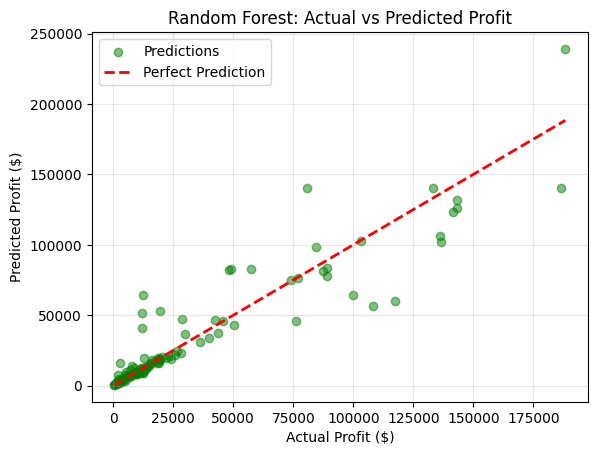

In [235]:
# Random forest actual vs predicted
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Profit')
plt.xlabel('Actual Profit ($)')
plt.ylabel('Predicted Profit ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Model Comparison

In [236]:
# Model comparison summary
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression (Baseline)', 'Random Forest (Default)'],
    'R2 Score': [r2, r2_rf],
    'RMSE ($)': [rmse, rmse_rf],
    'MAE ($)': [mae, mae_rf]
})
print("MODEL PERFORMANCE COMPARISON")
print(comparison_df.to_string(index=False))

MODEL PERFORMANCE COMPARISON
                       Model  R2 Score     RMSE ($)      MAE ($)
Linear Regression (Baseline)  0.671080 23617.541947 14184.091585
     Random Forest (Default)  0.862276 15282.518584  7168.816531


RF achieves 28.5% better R2 and 35% lower RMSE - significant improvement showing non-linear relationships matter.
Practical Impact:

RF saves ~$7k in prediction error per product

RF Captures interactions Linear Regression misses

R2 Interpretation: RF explains 86% of profit variance vs LR's 67%
RF captures 19% more profit patterns.

# Model Cross Evaluation

In [237]:
from sklearn.model_selection import cross_val_score
lr_cv_scores = cross_val_score(model, X_train, y_train, cv=5,
                                scoring='r2', n_jobs=-1)
lr_cv_rmse = cross_val_score(model, X_train, y_train, cv=5,
                              scoring='neg_root_mean_squared_error', n_jobs=-1)

print("\nLinear Regression Cross-Validation:")
print(f"  R2 scores: {lr_cv_scores}")
print(f"  Mean R2: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")
print(f"  Mean RMSE: ${-lr_cv_rmse.mean():,.2f}")


Linear Regression Cross-Validation:
  R2 scores: [0.62520548 0.64917083 0.68005879 0.59540993 0.68736215]
  Mean R2: 0.6474 (+/- 0.0685)
  Mean RMSE: $25,609.98



Mean R2: 0.6474 - explains 65% of profit variance

Std: +-0.0685 - reasonably consistent across folds



In [238]:
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5,
                                scoring='r2', n_jobs=-1)
rf_cv_rmse = cross_val_score(rf_model, X_train, y_train, cv=5,
                              scoring='neg_root_mean_squared_error', n_jobs=-1)

print("\nRandom Forest Cross-Validation:")
print(f"  R2 scores: {rf_cv_scores}")
print(f"  Mean R2: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")
print(f"  Mean RMSE: ${-rf_cv_rmse.mean():,.2f}")


Random Forest Cross-Validation:
  R2 scores: [0.91759391 0.85583318 0.88113111 0.89397446 0.79049681]
  Mean R2: 0.8678 (+/- 0.0870)
  Mean RMSE: $15,381.29


Mean R2: 0.8678 - explains 87% of profit variance

34% improvement over baseline

RMSE: $15,381 - 40% lower error than Linear Regression

Std: +-0.0870 - slightly more variable but still good

# Hyperperameters

In [239]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV R2: {grid_search.best_score_:.4f}")

# Evaluate tuned model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"Test R2: {r2_tuned:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best CV R2: 0.8886
Test R2: 0.8535


Hyperparameter tuning improved CV performance but decreased test performance, indicating overfitting to training folds. The default perameters will be chosen.

In [240]:
# Complete comparison with tuning
full_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'RF (Default)', 'RF (Tuned)'],
    'Test R2': [r2, r2_rf, r2_tuned],
    'CV R2': [lr_cv_scores.mean(), rf_cv_scores.mean(), grid_search.best_score_],
    'Test RMSE': [rmse, rmse_rf, np.sqrt(mean_squared_error(y_test, y_pred_tuned))]
})

print("Comparison of models")

print(full_comparison.to_string(index=False))



Comparison of models
            Model  Test R2    CV R2    Test RMSE
Linear Regression 0.671080 0.647441 23617.541947
     RF (Default) 0.862276 0.867806 15282.518584
       RF (Tuned) 0.853548 0.888580 15759.300170


The default random forest has the highest test R2 score

# Feature importance

In [241]:
lr_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Coefficient': model.coef_,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=False)

print("Linear Regression Feature Importance:")
print(lr_importance)

Linear Regression Feature Importance:
               Feature  Coefficient  Importance
0           Sale Price    47.740835   47.740835
2  Manufacturing Price    10.479602   10.479602
1           Units Sold     4.673341    4.673341
3                 COGS     0.134054    0.134054


In [242]:
rf_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importance)


Random Forest Feature Importance:
               Feature  Importance
3                 COGS    0.684941
0           Sale Price    0.201640
1           Units Sold    0.096384
2  Manufacturing Price    0.017034


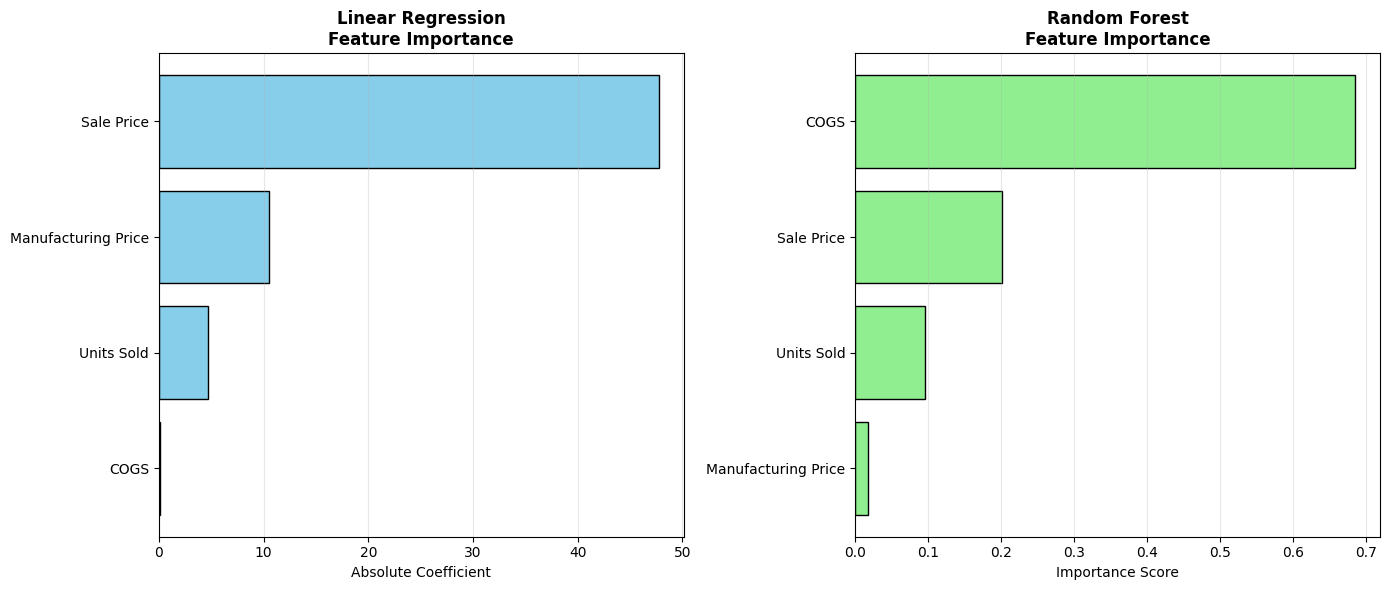

In [243]:
# Side-by-side feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

lr_sorted = lr_importance.sort_values('Importance', ascending=True)
ax1.barh(lr_sorted['Feature'], lr_sorted['Importance'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Absolute Coefficient')
ax1.set_title('Linear Regression\nFeature Importance', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

rf_sorted = rf_importance.sort_values('Importance', ascending=True)
ax2.barh(rf_sorted['Feature'], rf_sorted['Importance'], color='lightgreen', edgecolor='black')
ax2.set_xlabel('Importance Score')
ax2.set_title('Random Forest\nFeature Importance', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

INSIGHT: LR prioritizes Sale Price (linear), RF identifies COGS (non-linear interactions)

# Error analysis of RF

In [244]:
# Error analysis
residuals = y_test.values - y_pred_rf
abs_errors = np.abs(residuals)
percent_errors = (abs_errors / np.abs(y_test.values)) * 100


print("ERROR STATISTICS")

print(f"Mean Absolute Error: ${abs_errors.mean():,.2f}")
print(f"Median Absolute Error: ${np.median(abs_errors):,.2f}")
print(f"Max Error: ${abs_errors.max():,.2f}")
print(f"Mean Percentage Error: {percent_errors.mean():.2f}%")

within_10 = (percent_errors <= 10).sum()
within_20 = (percent_errors <= 20).sum()
print(f"\nWithin 10% error: {within_10}/{len(percent_errors)} ({within_10/len(percent_errors)*100:.1f}%)")
print(f"Within 20% error: {within_20}/{len(percent_errors)} ({within_20/len(percent_errors)*100:.1f}%)")

ERROR STATISTICS
Mean Absolute Error: $7,168.82
Median Absolute Error: $1,021.23
Max Error: $59,754.21
Mean Percentage Error: 33.86%

Within 10% error: 51/128 (39.8%)
Within 20% error: 80/128 (62.5%)


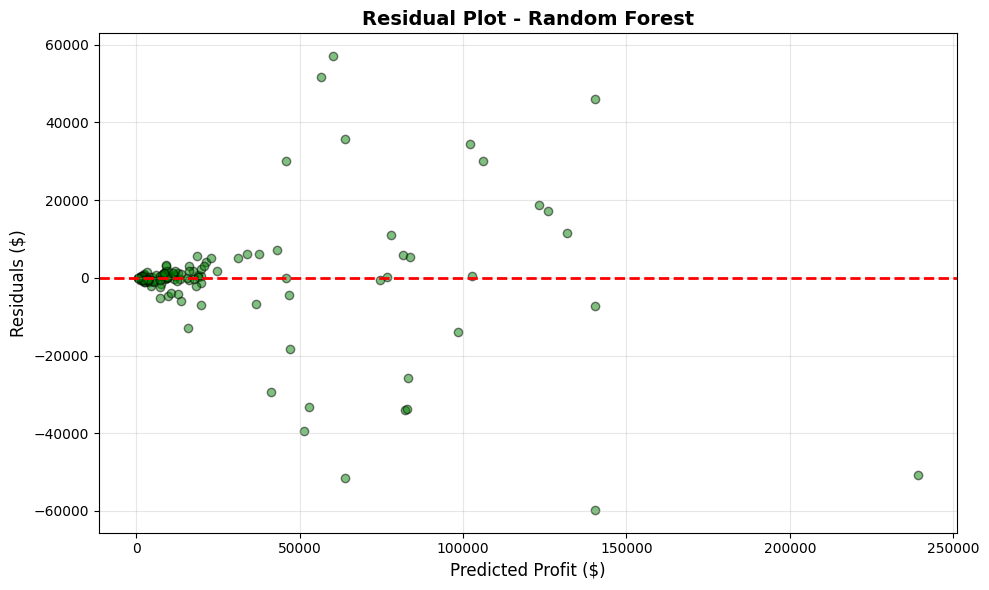

In [245]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, edgecolor='black', color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Profit ($)', fontsize=12)
plt.ylabel('Residuals ($)', fontsize=12)
plt.title('Residual Plot - Random Forest', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Model is reliable for majority of predictions (median $1k error), but struggles with edge cases that create large errors and skew the mean.

In [246]:
# Top 10 worst predictions
error_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf,
    'Abs_Error': abs_errors,
    'Pct_Error': percent_errors
}, index=y_test.index)

print("WHERE MODEL FAILS - Top 10 Largest Errors:")
print(error_df.nlargest(10, 'Abs_Error'))

print("\nWHERE MODEL SUCCEEDS - Top 10 Best Predictions:")
print(error_df.nsmallest(10, 'Abs_Error'))

WHERE MODEL FAILS - Top 10 Largest Errors:
       Actual      Predicted     Abs_Error   Pct_Error
679   80662.5  140416.714405  59754.214405   74.079299
72   117406.0   60339.009917  57066.990083   48.606536
69   108147.0   56484.865774  51662.134226   47.770289
695   12375.0   64013.691274  51638.691274  417.282354
353  188378.0  239117.890000  50739.890000   26.935146
82   186407.5  140416.714405  45990.785595   24.672176
655   11968.0   51389.485333  39421.485333  329.390753
155   99814.5   64038.340489  35776.159511   35.842648
81   136535.0  102043.203000  34491.797000   25.262238
645   48257.0   82398.730000  34141.730000   70.749798

WHERE MODEL SUCCEEDS - Top 10 Best Predictions:
       Actual     Predicted   Abs_Error  Pct_Error
446    493.20    522.919667   29.719667   6.025885
472  45880.00  45849.834346   30.165654   0.065749
556   9370.80   9331.525945   39.274055   0.419111
86    2486.25   2543.895682   57.645682   2.318579
636   1761.54   1847.898032   86.358032   4.9024

# Where model Fails:

Extreme overestimation on low proffit items seen in rows 679, 695, 655: (74-417% error)

High profit underestimation on rows 72, 69, 353: (25-48% error)

# Where model succeed:

Mid range proffits (500-50k)

Typical configurations - Standard price/COGS/units combinations

Best case - 45,880 predicted as 45,850 (0.07% error)


# Root causes:

Training data lacks extreme profit examples

Non-linear patterns in outlier cases (very high/low margins)

Possible data quality issues (417% error suggests bad data)